# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [17]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/2019_Yellow_Taxi_Trip_Data.csv')
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [3]:
df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [7]:
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [22]:
df['trip_distance'].max(), df.trip_distance.max()  # Two different approaches

(38.11, 38.11)

In [23]:
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].loc[df['trip_distance'].idxmax()]

fare_amount     176.00
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: float64

In [24]:
# Another approach:
df[df.trip_distance == df.trip_distance.max()][['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [2]:
df = pd.read_csv('../Data/Meteorite_Landings.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
df.rename(columns={'mass (g)':'mass'}, inplace=True)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
df = df[df.columns[:-3]]
df.head()

,name,id,nametype,recclass,mass,fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM


In [5]:
df.sort_values(by='mass', ascending=False, inplace=True)
df.head()

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [6]:
df['year'] = df.year.str.slice(6,10)

In [7]:
df.head()

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898


In [8]:
# First we need to replace NaN values with 0
df = df.fillna(0)

In [9]:
df['year'] = df['year'].astype(int)

In [10]:
df['fell_before_1970'] = df['year'] < 1970
df.head()

,name,id,nametype,recclass,mass,fall,year,fell_before_1970
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,True
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818,True
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,True
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891,True
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898,True


In [11]:
df.set_index('id', inplace=True)
df.head()

,name,nametype,recclass,mass,fall,year,fell_before_1970
id,,,,,,,
11890,Hoba,Valid,"Iron, IVB",60000000.0,Found,1920,True
5262,Cape York,Valid,"Iron, IIIAB",58200000.0,Found,1818,True
5247,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,1575,True
5257,Canyon Diablo,Valid,"Iron, IAB-MG",30000000.0,Found,1891,True
2335,Armanty,Valid,"Iron, IIIE",28000000.0,Found,1898,True


In [12]:
df.sort_index(inplace=True )
df.head()

,name,nametype,recclass,mass,fall,year,fell_before_1970
id,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880,True
2,Aarhus,Valid,H6,720.0,Fell,1951,True
4,Abajo,Valid,H5,331.0,Found,1982,False
5,Abbott,Valid,H3-6,21100.0,Found,1951,True
6,Abee,Valid,EH4,107000.0,Fell,1952,True


In [13]:
df.loc[10036:10040]

,name,nametype,recclass,mass,fall,year,fell_before_1970
id,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967,True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883,True
10038,Enshi,Valid,H5,8000.0,Fell,1974,False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491,True


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [20]:
pd.set_option('display.float_format', '{:,.0f}'.format)
df_pivoted = df\
    .query('year >= 2005 and year <= 2009')\
    .pivot_table(index='year', columns='fall', values='mass', aggfunc=['count', lambda x: x.quantile(0.95)]).rename(columns={'<lambda>':'95th_percentile'})
df_pivoted

count       95th_percentile      
fall  Fell Found            Fell Found
year                                  
2005   NaN   875             NaN 4,500
2006     5 2,451          25,008 1,599
2007     8 1,181          89,675 1,127
2008     9   948         106,000 2,275
2009     5 1,492           8,333 1,397

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [27]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.groupby(['fall'])['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,"1,107.00","45,710.04","706,661.55",0.00,597.00,"2,500.00","10,000.00","23,000,000.00"
Found,"44,609.00","12,434.27","570,471.96",0.00,6.90,30.22,177.00,"60,000,000.00"


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [70]:
tsa_melted_holiday_travel = pd.read_csv(
    '../Data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


In [51]:
traveler_data = tsa_melted_holiday_travel.pivot_table(columns='year', values='travelers', aggfunc='sum')
traveler_data

year,2019,2020,2021
travelers,842961073.0,321881594.0,149092738.0


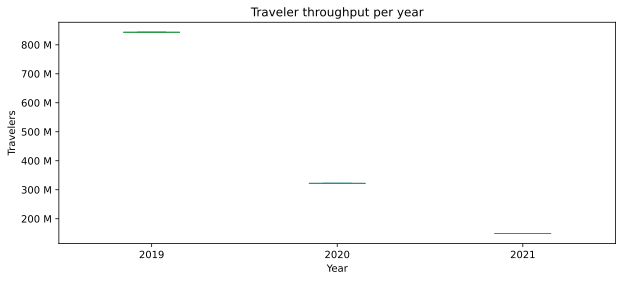

In [52]:
ax = traveler_data.plot(kind='box', figsize=(10,4))
ax.set(title='Traveler throughput per year', xlabel='Year', ylabel='Travelers')
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [71]:
import seaborn as sns
import calendar

In [72]:
tsa_melted_holiday_travel['year'] = pd.to_datetime(tsa_melted_holiday_travel['year'], errors='coerce')
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,1970-01-01 00:00:00.000002019,2126398.0,New Year's Day
2019-01-02,1970-01-01 00:00:00.000002019,2345103.0,New Year's Day
2019-01-03,1970-01-01 00:00:00.000002019,2202111.0,NaN
2019-01-04,1970-01-01 00:00:00.000002019,2150571.0,NaN
2019-01-05,1970-01-01 00:00:00.000002019,1975947.0,NaN


In [73]:
travelers_2019 = tsa_melted_holiday_travel.loc['2019']\
  .assign(month=lambda x: x.index.month, weekday=lambda x: x.index.weekday)\
  .pivot_table(index='month', columns='weekday', values='travelers', aggfunc=np.median)

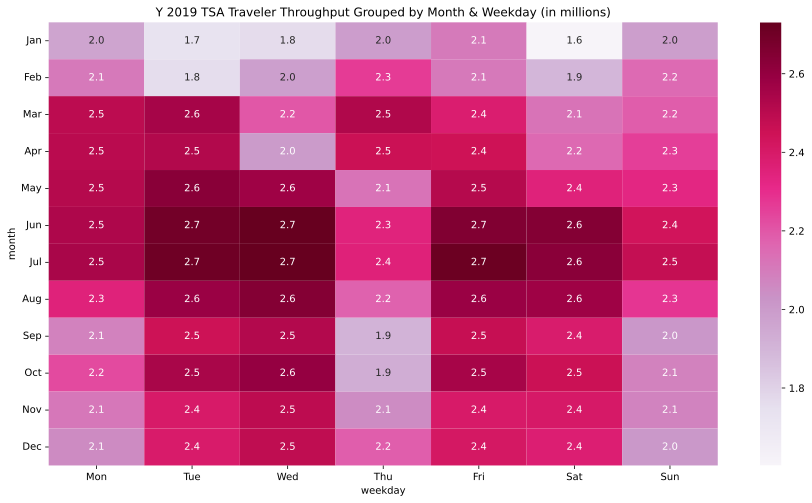

In [74]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(data=travelers_2019 / 1e6, cmap='PuRd', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_xticklabels(calendar.day_abbr)
_ = ax.set_title('Y 2019 TSA Traveler Throughput Grouped by Month & Weekday (in millions)')

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.